# Installing necessary packages, can ask the users to restart the notebook

In [71]:
# Install required system libraries
!dnf install -y libjpeg-turbo-devel zlib-devel graphviz

# Install Python packages
%pip install --upgrade scikit-image PyMuPDF python-docx opencv-python scipy torch torchvision pillow tensorflow gdown pydot

!dnf install fonts-noto-core fonts-noto-ui-core fonts-noto-unhinted

The requested operation requires superuser privileges. Please log in as a user with elevated rights, or use the "--assumeno" or "--downloadonly" options to run the command without modifying the system state.

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
The requested operation requires superuser privileges. Please log in as a user with elevated rights, or use the "--assumeno" or "--downloadonly" options to run the command without modifying the system state.


In [72]:
!pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


You will be prompted to Restart the session. Continue running the cells after restarting

# Importing the necessary modules

In [73]:
# Data Pre-processing
import fitz
import cv2
import csv
import os
from docx import Document
import string
import requests
import pandas as pd
import numpy as np
from PIL import Image, ImageOps
from IPython.display import clear_output as cls

# Data
from glob import glob
from tqdm import tqdm
import tensorflow.data as tfd

# Data Visualization
import matplotlib.pyplot as plt

# Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.utils import plot_model

# Downloading the dataset

In [74]:
# # Downloading the Dataset on collab/local notebook

# # Virtuosa ( Dataset 1)
# !gdown 'http://drive.google.com/uc?id=10NX_UbV2HMbPEO2fvKYAIXOOOec0g38g'  # Downloading link for Ancient Text
# # !gdown 'http://drive.google.com/uc?id=1YTaqNoZCYP74AuQxlyJsiQLhcoc8DNSv'  # Downloading link for Ground Truth Text

# # Perfecto ( Dataset 2)
# !gdown 'http://drive.google.com/uc?id=1x6FS3z4WhsHS7s38a2oSH8JnLQ_u_f21'  # Downloading link for Ancient Text
# # !gdown 'http://drive.google.com/uc?id=1YqQ04ZQR4xdjKlQS9xL9zkkWYx_Ppxwa'  # Downloading link for Ground Truth Text

!gdown 'http://drive.google.com/uc?id=1r7TjJ9RjNZHxAzKhd4uOaRWanrQXIqw8'  # Downloading utils.py from cloud

Downloading...
From (original): http://drive.google.com/uc?id=1r7TjJ9RjNZHxAzKhd4uOaRWanrQXIqw8
From (redirected): https://drive.google.com/uc?id=1r7TjJ9RjNZHxAzKhd4uOaRWanrQXIqw8&confirm=t&uuid=988b9048-5311-47fd-a42d-32a61fe3e229
To: /home/psyduck/Desktop/Opensource/RenAIssance_CRNN_OCR_Shashank_Shekhar_Singh/utils.py
100%|███████████████████████████████████████| 17.0k/17.0k [00:00<00:00, 439kB/s]


In [75]:
!ls

Model.ipynb  test_file.pdf  utils.py


# Pre-processing the dataset

### Converting PDF to images

In [76]:
from utils import pdf_to_images

pdf_path1 = "./test_file.pdf"  # Path to the PDF file
unproc_images_folder_1 = "./preprocessing/imgsUnProcessed1"  # Output folder to save the images
if not os.path.exists(unproc_images_folder_1):
    os.makedirs(unproc_images_folder_1)
pdf_to_images(pdf_path1, unproc_images_folder_1)

<img src="https://raw.githubusercontent.com/ML4SCI/DeepLearnHackathon/main/NLPRenaissanceChallenge/images/imageOriginal.png">

<!-- ### Splitting two sided scanned images into individual pages. -->

In [77]:
# Check if the folder already exists
if not os.path.exists('CRAFT_Model'):
    # If it doesn't exist, clone the repository
    !git clone 'https://github.com/nahcol10/CRAFT_Model'
else:
    print(f"The repository already exists.")

Cloning into 'CRAFT_Model'...
remote: Enumerating objects: 29, done.
remote: Total 29 (delta 0), reused 0 (delta 0), pack-reused 29 (from 1)
Receiving objects: 100% (29/29), 73.64 MiB | 12.49 MiB/s, done.


# Text Detection
### Extracting words from a scanned text page image can be achieved using any model of your choice. We are using the [CRAFT Model](https://github.com/clovaai/CRAFT-pytorch) for the same. (This will take 3-4 mins to process the entire model)

In [78]:
#It generally takes about ~3-4 mins
!python3 CRAFT_Model/CRAFT/BoundBoxFunc/test.py --result_folder='./preprocessing/BoundBoxApplied1/' --test_folder="./preprocessing/imgsUnProcessed1" --trained_model='CRAFT_Model/CRAFT/BoundBoxFunc/weights/craft_mlt_25k.pth'

/home/psyduck/Desktop/Opensource/RenAIssance_CRNN_OCR_Shashank_Shekhar_Singh/.venv/lib64/python3.13/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/psyduck/Desktop/Opensource/RenAIssance_CRNN_OCR_Shashank_Shekhar_Singh/.venv/lib64/python3.13/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Loading weights from checkpoint (CRAFT_Model/CRAFT/BoundBoxFunc/weights/craft_mlt_25k.pth)
elapsed time : 19.60968017578125smgsUnProcessed1/page_5.png


### The output of this model provides coordinates of the polygon enclosing the word. Using these coordinates one can draw a bounding box and crop word images.

In [79]:
#Sorting the BB based on the Spanish writing style
from utils import sort_bounding_boxes

bound_box_applied1 = './preprocessing/BoundBoxApplied1/'
bound_box_sorted1 = "./preprocessing/BoundBoxSorted1"
if not os.path.exists(bound_box_sorted1):
    os.makedirs(bound_box_sorted1)
sort_bounding_boxes(bound_box_applied1, bound_box_sorted1)

<img src="https://raw.githubusercontent.com/ML4SCI/DeepLearnHackathon/main/NLPRenaissanceChallenge/images/imageCRAFT.jpg">

# Generating Test Data

###  Extracts and saves bounding boxes from images using a numeric counter for filenames, skipping the training images.

In [80]:
# from utils import apply_extraction_to_folder_for_test
from utils import count_files_in_folder, extract_bounding_boxes

def apply_extraction_to_folder_for_test(image_folder, bounding_box_folder, output_folder, word, TRAIN_PAGES):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Get list of image files in the folder
    image_files = [f for f in os.listdir(image_folder) 
                   if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    image_files.sort()  # Ensure consistent ordering
    
    # Skip training pages and process remaining images
    test_images = image_files[TRAIN_PAGES:]
    
    for image_filename in test_images:
        if image_filename.endswith('.png') or image_filename.endswith('.jpg'):
            image_base_name = os.path.splitext(image_filename)[0]
            print(f"Processing: {image_base_name}")
            
            # Try different naming patterns for bounding box files
            possible_bb_names = [
                f"res_{image_base_name}_sorted.txt",  # res_image_1_sorted.txt
                f"res_{image_base_name.replace('image_', 'page_')}_sorted.txt"  # res_page_1_sorted.txt
            ]
            
            bounding_box_path = None
            for bb_name in possible_bb_names:
                bb_path = os.path.join(bounding_box_folder, bb_name)
                if os.path.exists(bb_path):
                    bounding_box_path = bb_path
                    print(f"Found bounding box file: {bb_name}")
                    break
            
            if bounding_box_path:
                image_path = os.path.join(image_folder, image_filename)
                word = extract_bounding_boxes(image_path, bounding_box_path, output_folder, word)
            else:
                print(f'Bounding box file for {image_filename} does not exist.')
                print(f'Tried: {possible_bb_names}')
    
    return word

# Apply extraction for test data
proc_images_folder_1 = './preprocessing/imgsUnProcessed1'
bound_box_sorted1 = './preprocessing/BoundBoxSorted1'
word = 0
TRAIN_PAGES = 0
testing_data1 = './testing_data1'

word = apply_extraction_to_folder_for_test(proc_images_folder_1, bound_box_sorted1, testing_data1, word, TRAIN_PAGES)
print(f"Total words extracted: {word}")

Processing: page_1
Found bounding box file: res_page_1_sorted.txt
Processing: page_2
Found bounding box file: res_page_2_sorted.txt
Processing: page_3
Found bounding box file: res_page_3_sorted.txt
Processing: page_4
Found bounding box file: res_page_4_sorted.txt
Processing: page_5
Found bounding box file: res_page_5_sorted.txt
Total words extracted: 1561


In [81]:
from utils import pad_and_resize_images

testing_data1 = './testing_data1'
pad_and_resize_images(testing_data1)

Processed and replaced: ./testing_data1/0;0.png
Processed and replaced: ./testing_data1/1;0.png
Processed and replaced: ./testing_data1/2;0.png
Processed and replaced: ./testing_data1/3;0.png
Processed and replaced: ./testing_data1/4;0.png
Processed and replaced: ./testing_data1/5;0.png
Processed and replaced: ./testing_data1/6;0.png
Processed and replaced: ./testing_data1/7;0.png
Processed and replaced: ./testing_data1/8;1.png
Processed and replaced: ./testing_data1/9;1.png
Processed and replaced: ./testing_data1/10;1.png
Processed and replaced: ./testing_data1/11;1.png
Processed and replaced: ./testing_data1/12;1.png
Processed and replaced: ./testing_data1/13;1.png
Processed and replaced: ./testing_data1/14;1.png
Processed and replaced: ./testing_data1/15;1.png
Processed and replaced: ./testing_data1/16;1.png
Processed and replaced: ./testing_data1/17;1.png
Processed and replaced: ./testing_data1/18;1.png
Processed and replaced: ./testing_data1/19;2.png
Processed and replaced: ./test

# Gathering Training Data

### 2 methods of generating training data:
1. Use the Dataset_generation.ipynb
2. Use modified and corrected data from drive link(better results)

### Generating training data using Dataset_generation Function

Run the Dataset_Generation.ipynb before running this notebook, to generate the training data. OR Directly run the below command

In [27]:
# %pip install jupyter nbconvert

In [28]:
# !jupyter nbconvert --to notebook --execute Dataset_Generation.ipynb

In [ ]:
# Transferring the corrected dataset to the correct location for training
# !mv './outputChanged/output' './training_data1'

### Manually Corrected Training data

In [82]:
# Training data, corrrected manually
!gdown 'https://drive.google.com/uc?id=1_DuVxFZXezged33ymjVgXAGmD2FKgqmi' -O outputCorrected.zip
!unzip outputCorrected.zip

Downloading...
From: https://drive.google.com/uc?id=1_DuVxFZXezged33ymjVgXAGmD2FKgqmi
To: /home/psyduck/Desktop/Opensource/RenAIssance_CRNN_OCR_Shashank_Shekhar_Singh/outputCorrected.zip
100%|████████████████████████████████████████| 351k/351k [00:00<00:00, 1.32MB/s]
Archive:  outputCorrected.zip
   creating: labeled_data/
 extracting: labeled_data/अध्ययनहरूका.png  
  inflating: labeled_data/अनुसन्धानकर्ताहरूको.png  
 extracting: labeled_data/अन्तिम.png  
 extracting: labeled_data/अब.png  
 extracting: labeled_data/अभिभारा.png  
 extracting: labeled_data/आएको.png  
 extracting: labeled_data/आफूले.png  
 extracting: labeled_data/का.png  
 extracting: labeled_data/खण्ड.png  
 extracting: labeled_data/गरेका.png  
 extracting: labeled_data/गर्ने.png  
 extracting: labeled_data/गुणात्मक.png  
 extracting: labeled_data/चरणमा.png  
 extracting: labeled_data/चुनौतीपूर्ण.png  
 extracting: labeled_data/छ।.png  
 extracting: labeled_data/तथ्यहरूको.png  
 extracting: labeled_data/तथ्यांकलाई.png  

In [83]:
# Transferring the corrected dataset to the correct location for training
!mv './labeled_data' './training_data'

# Working on Training_data

### Padding small sized words for no distortion

In [84]:
from utils import pad_and_resize_images

# adding padding to the left and right of small sized words
training_data = './training_data'
pad_and_resize_images(training_data)

Processed and replaced: ./training_data/अध्ययनहरूका.png
Processed and replaced: ./training_data/अनुसन्धानकर्ताहरूको.png
Processed and replaced: ./training_data/अन्तिम.png
Processed and replaced: ./training_data/अब.png
Processed and replaced: ./training_data/अभिभारा.png
Processed and replaced: ./training_data/आएको.png
Processed and replaced: ./training_data/आफूले.png
Processed and replaced: ./training_data/का.png
Processed and replaced: ./training_data/खण्ड.png
Processed and replaced: ./training_data/गरेका.png
Processed and replaced: ./training_data/गर्ने.png
Processed and replaced: ./training_data/गुणात्मक.png
Processed and replaced: ./training_data/चरणमा.png
Processed and replaced: ./training_data/चुनौतीपूर्ण.png
Processed and replaced: ./training_data/छ।.png
Processed and replaced: ./training_data/तथ्यहरूको.png
Processed and replaced: ./training_data/तथ्यांकलाई.png
Processed and replaced: ./training_data/तेस्रो.png
Processed and replaced: ./training_data/दिन्छन्.png
Processed and rep

### Image Augmentation by Rotation

In [85]:
from utils import rotation_aug

training_data = './training_data'
rotation_aug(training_data)
print("Image augmentation by Rotation completed.")

Image augmentation by Rotation completed.


### Image augmentation by Gaussian Noise

In [86]:
from utils import gaussian_noise_aug

training_data = './training_data'
gaussian_noise_aug(training_data)
print("Image augmentation by Gaussian Noise completed.")

Image augmentation by Gaussian Noise completed.


### Creates a CSV file listing all files in a specified folder, excluding files named ".png", with columns for the filename and its identity (name without extension).

In [87]:
from utils import create_csv_from_folder

# Train data
training_data = './training_data'
train_csv_path = './training_data.csv'
create_csv_from_folder(training_data, train_csv_path)

# Test data
test_data1 = "./testing_data1"
test_csv_path1 = './testing_data1.csv'
create_csv_from_folder(test_data1, test_csv_path1)

CSV file "./training_data.csv" created successfully.
CSV file "./testing_data1.csv" created successfully.


In [88]:
import pandas as pd

### Splitting train and test dataset

In [89]:
df = pd.read_csv('training_data.csv')
df.shape

(6512, 2)

In [90]:
df['IDENTITY'] = df['IDENTITY'].apply(lambda x: x.split('_')[0]).apply(lambda x: x.split(' ')[0])

In [91]:
TRAIN_SIZE = int(df.shape[0]*0.8)
df_train = df.iloc[:TRAIN_SIZE]
df_valid = df.iloc[TRAIN_SIZE+1:]

In [92]:
df_train.to_csv('train.csv', index=False)
df_train.head()

,FILENAME,IDENTITY
0,अध्ययनहरूका.png,अध्ययनहरूका
1,अनुसन्धानकर्ताहरूको.png,अनुसन्धानकर्ताहरूको
2,अन्तिम.png,अन्तिम
3,अब.png,अब
4,अभिभारा.png,अभिभारा


In [93]:
df_valid.to_csv('valid.csv', index=False)
df_valid.head()


,FILENAME,IDENTITY
5210,परियोजना_rot4_gauss.png,परियोजना
5211,परियोजना_rot5_gauss.png,परियोजना
5212,परिचय_rot-5_gauss.png,परिचय
5213,परिचय_rot-4_gauss.png,परिचय
5214,परिचय_rot-3_gauss.png,परिचय


### This code sets up configuration parameters and file paths for training, validating, and testing an OCR model, including image size, batch size, number of epochs, model name, callbacks, learning rate, random seeds, dataset file paths, data sizes, and prefetching settings.

In [94]:
# Image Size
IMG_WIDTH = 200
IMG_HEIGHT = 50
IMAGE_SIZE = (IMG_WIDTH, IMG_HEIGHT)

# Batch Size
BATCH_SIZE = 16

# EPOCHS
EPOCHS = 15  # It can be increased for generating the final model.

# Model Name
MODEL_NAME = 'NepaliOCR'

# Callbacks
CALLBACKS = [
    callbacks.EarlyStopping(patience=10, restore_best_weights=True),
    callbacks.ModelCheckpoint(filepath=MODEL_NAME + ".h5", save_best_only=True)  # .h5 extension removed
]

# Learning Rate
LEARNING_RATE = 1e-3

# Random Seed
np.random.seed(2569)
tf.random.set_seed(2569)

# File Paths ( replace 1 by 2,3 ... so as to test other folders)
train_csv_path = './train.csv'
valid_csv_path = './valid.csv'
test_csv_path = './testing_data1.csv'

train_image_dir = './training_data'
valid_image_dir = './training_data'
test_image_dir = './testing_data1'

# AUTOTUNE
AUTOTUNE = tfd.AUTOTUNE

In [95]:
# Train CSV
train_csv = pd.read_csv(train_csv_path)

# Validation CSV
valid_csv = pd.read_csv(valid_csv_path)

# Test CSV
test_csv = pd.read_csv(test_csv_path)

In [96]:
# In order to convert int to string to prevent tf error
test_csv['IDENTITY'] = test_csv['IDENTITY'].apply(lambda x: str(x))

In [27]:
labels = [str(word) for word in df['IDENTITY'].to_numpy()]
labels[:10]

['अध्ययनहरूका',
 'अनुसन्धानकर्ताहरूको',
 'अन्तिम',
 'अब',
 'अभिभारा',
 'आएको',
 'आफूले',
 'का',
 'खण्ड',
 'गरेका']

### This code extracts unique characters from the dataset labels, calculates the total number of unique characters, and prints both the count and the set of unique characters

In [97]:
# Unique characters
unique_chars = set(char for word in labels for char in word)
n_classes = len(unique_chars)

# Show
print(f"Total number of unique characters : {n_classes}")
print(f"Unique Characters : \n{unique_chars}")

Total number of unique characters : 62
Unique Characters : 
{'ठ', 'ह', 'ु', 'ए', '८', 'ण', 'न', 'य', '०', 'छ', 'र', 'भ', 'प', 'े', 'ग', 'ध', '५', 'उ', 'थ', 'श', 'औ', 'ि', 'त', ')', '।', '्', 'ा', 'ं', 'ै', 'ँ', 'ष', 'आ', 'ड', '.', ',', 'फ', 'ज', 'ृ', 'ो', 'ढ', '९', '२', 'ई', 'व', 'म', 'ौ', 'ट', 'ञ', 'ब', 'झ', 'द', 'ू', 'ी', 'ख', '-', 'इ', 'अ', 'ल', 'च', 'स', '१', 'क'}


In [98]:
MAX_LABEL_LENGTH = max(map(len, labels))
print(f"Maximum length of a label : {MAX_LABEL_LENGTH}")

Maximum length of a label : 21


### This code updates the file paths in the FILENAME columns of the training, validation, and test CSV dataframes by prepending the respective image directory paths to each filename.

In [99]:
train_csv['FILENAME'] = [train_image_dir + f"/{filename}" for filename in train_csv['FILENAME']]
valid_csv['FILENAME'] = [valid_image_dir + f"/{filename}" for filename in valid_csv['FILENAME']]
test_csv['FILENAME']  = [test_image_dir + f"/{filename}" for filename in test_csv['FILENAME']]

In [100]:
train_csv.head()

,FILENAME,IDENTITY
0,./training_data/अध्ययनहरूका.png,अध्ययनहरूका
1,./training_data/अनुसन्धानकर्ताहरूको.png,अनुसन्धानकर्ताहरूको
2,./training_data/अन्तिम.png,अन्तिम
3,./training_data/अब.png,अब
4,./training_data/अभिभारा.png,अभिभारा


In [101]:
test_csv.head()

,FILENAME,IDENTITY
0,./testing_data1/0;0.png,0;0
1,./testing_data1/1;0.png,1;0
2,./testing_data1/2;0.png,2;0
3,./testing_data1/3;0.png,3;0
4,./testing_data1/4;0.png,4;0


### This code creates two dictionaries: one that maps unique characters to numeric values using StringLookup, and another that reverses this mapping, converting numeric values back to characters.

In [102]:
# Character to numeric value dictionary
char_to_num = layers.StringLookup(
    vocabulary = list(unique_chars),
    mask_token = None
)

# Reverse dictionary
num_to_char = layers.StringLookup(
    vocabulary = char_to_num.get_vocabulary(),
    mask_token = None,
    invert = True
)

### This function loads an image from a given path, decodes it as a JPEG, converts it to a tensor, resizes and normalizes it, and then returns the processed image as a tensor.

In [103]:
def load_image(image_path : str):
    '''
    This function loads and preprocesses images. It first receives the image path, which is used to
    decode the image as a JPEG using TensorFlow. Then, it converts the image to a tensor and applies
    two processing functions: resizing and normalization. The processed image is then returned by
    the function.

    Argument :
        image_path : The path of the image file to be loaded.

    Return:
        image : The loaded image as a tensor.
    '''

    # Read the Image
    image = tf.io.read_file(image_path)

    # Decode the image
    decoded_image = tf.image.decode_jpeg(contents = image, channels = 1)

    # Convert image data type.
    cnvt_image = tf.image.convert_image_dtype(image = decoded_image, dtype = tf.float32)

    # Resize the image
    resized_image = tf.image.resize(images = cnvt_image, size = (IMG_HEIGHT, IMG_WIDTH))

    # Transpose
    image = tf.transpose(resized_image, perm = [1, 0, 2])

    # Convert image to a tensor.
    image = tf.cast(image, dtype = tf.float32)

    # Return loaded image
    return image

### This function loads and preprocesses an image, converts a given label string into a sequence of numeric values, pads the numeric sequence to a fixed length, and returns a dictionary containing the processed image tensor and the label tensor.

In [104]:
def encode_single_sample(image_path : str, label : str):

    '''
    The function takes an image path and label as input and returns a dictionary containing the processed image tensor and the label tensor.
    First, it loads the image using the load_image function, which decodes and resizes the image to a specific size. Then it converts the given
    label string into a sequence of Unicode characters using the unicode_split function. Next, it uses the char_to_num layer to convert each
    character in the label to a numerical representation. It pads the numerical representation with a special class (n_classes)
    to ensure that all labels have the same length (MAX_LABEL_LENGTH). Finally, it returns a dictionary containing the processed image tensor
    and the label tensor.

    Arguments :
        image_path : The location of the image file.
        label      : The text to present in the image.

    Returns:
        dict : A dictionary containing the processed image and label.
    '''

    # Get the image
    image = load_image(image_path)

    # Convert the label into characters
    chars = tf.strings.unicode_split(label, input_encoding='UTF-8')

    # Convert the characters into vectors
    vecs = char_to_num(chars)

    # Pad label
    pad_size = MAX_LABEL_LENGTH - tf.shape(vecs)[0]
    vecs = tf.pad(vecs, paddings = [[0, pad_size]], constant_values=n_classes+1)

    return {'image':image, 'label':vecs}

### This code splits the combined dataset into training and validation subsets, shuffles the data, and then creates batched and prefetched TensorFlow datasets for efficient data loading during model training.

In [105]:
# Further split the training dataset into training and validation subsets
train_size = int(0.8*len(df))  # 80% of the training data for training
val_size = len(df) - train_size  # Remaining 20% for validation

# Splitting the training dataset
train_ds = tf.data.Dataset.from_tensor_slices(
    (np.array(df['FILENAME'].to_list()), np.array(df['IDENTITY'].to_list()))
).shuffle(train_size)

# Create training dataset
train_ds = train_ds.take(train_size).batch(BATCH_SIZE).prefetch(AUTOTUNE)

# Create validation dataset
valid_ds = train_ds.skip(train_size).batch(BATCH_SIZE).prefetch(AUTOTUNE)

### This code creates TensorFlow datasets for training, validation, and testing by loading image paths and labels, shuffling the training data, applying the encode_single_sample function to preprocess the images and labels, batching the data, and using prefetching for optimized data loading.

In [106]:
# Training Data
train_ds = tf.data.Dataset.from_tensor_slices(
    (np.array(train_csv['FILENAME'].to_list()), np.array(train_csv['IDENTITY'].to_list()))
).shuffle(train_size).map(encode_single_sample, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

# # Validation data
valid_ds = tf.data.Dataset.from_tensor_slices(
    (np.array(valid_csv['FILENAME'].to_list()), np.array(valid_csv['IDENTITY'].to_list()))
).map(encode_single_sample, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

# # Testing data.
test_ds = tf.data.Dataset.from_tensor_slices(
    (np.array(test_csv['FILENAME'].to_list()), np.array(test_csv['IDENTITY'].to_list()))
).map(encode_single_sample, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

In [107]:
print(f"Training Data Size   : {tf.data.Dataset.cardinality(train_ds).numpy() * BATCH_SIZE}")
print(f"Validation Data Size : {tf.data.Dataset.cardinality(valid_ds).numpy() * BATCH_SIZE}")
print(f"Testing Data Size    : {tf.data.Dataset.cardinality(test_ds).numpy() * BATCH_SIZE}")

Training Data Size   : 5216
Validation Data Size : 1312
Testing Data Size    : 1568


### Resizes all images in the input folder to a specified size and saves them as PNG files in the output folder, ensuring the output directory exists.

In [108]:
# Set the new size in pixels (width, height) according to your choice
def resize_images_in_folder(input_folder, new_size=(200,50)):
    # Loop through all files in the input folder
    for filename in os.listdir(input_folder):
        # Open the image
        with Image.open(os.path.join(input_folder, filename)) as img:
            # Resize the image
            resized_img = img.resize(new_size)
            # Save the resized image to the output folder
            output_filename = os.path.splitext(filename)[0] + '.png'  # Ensure output format is PNG
            resized_img.save(os.path.join(input_folder, output_filename))

training_image_dir = "./training_data"
resize_images_in_folder(training_image_dir)

test_image_dir = "./testing_data1"
resize_images_in_folder(test_image_dir)

### Displays a grid of images with their true labels, and optionally their predicted labels if a model is provided, using Matplotlib for visualization.


/home/psyduck/Desktop/Opensource/RenAIssance_CRNN_OCR_Shashank_Shekhar_Singh/.venv/lib64/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 108 (l) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
/home/psyduck/Desktop/Opensource/RenAIssance_CRNN_OCR_Shashank_Shekhar_Singh/.venv/lib64/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 112 (p) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)


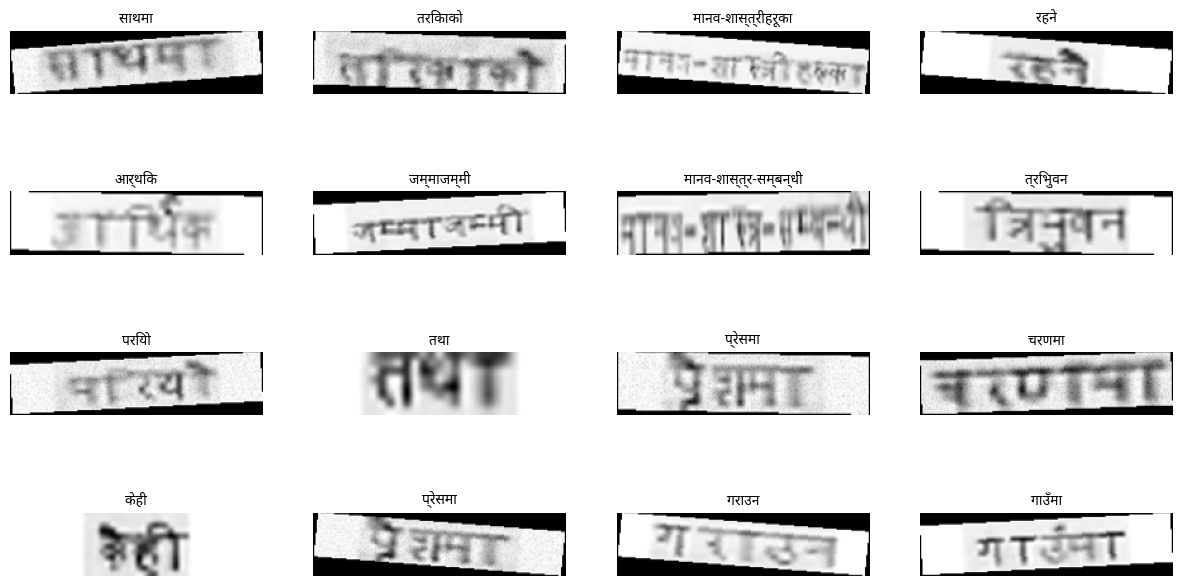

In [109]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# Set the font properties to use a Devanagari-supporting font
font_prop = font_manager.FontProperties(family='Noto Sans Devanagari')

def show_images(data, GRID=[4,4], FIGSIZE=(25, 8), cmap='binary_r', model=None, decode_pred=None):

    # Plotting configurations
    plt.figure(figsize=FIGSIZE)
    n_rows, n_cols = GRID

    # Loading Data
    data = next(iter(data))
    images, labels = data['image'], data['label']

    # Iterate over the data
    for index, (image, label) in enumerate(zip(images, labels)):

        # Label processing
        text_label = num_to_char(label)
        text_label = tf.strings.reduce_join(text_label).numpy().decode('UTF-8')
        text_label = text_label.replace("[UNK]", " ").strip()

        # Create a sub plot
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(tf.transpose(image, perm=[1,0,2]), cmap=cmap)
        plt.axis('off')

        if model is not None and decode_pred is not None:
            # Make prediction
            pred = model.predict(tf.expand_dims(image, axis=0))
            pred = decode_pred(pred)[0]
            title = f"True : {text_label}\\nPred : {pred}"
            # Use the font properties for the title
            plt.title(title, fontproperties=font_prop)
        else:
            # add title and use the font properties
            plt.title(text_label, fontproperties=font_prop)

    # Show the final plot
    cls()
    plt.show()

# Now, call the show_images function with your training data
show_images(train_ds, GRID=[4, 4], FIGSIZE=(15, 8))

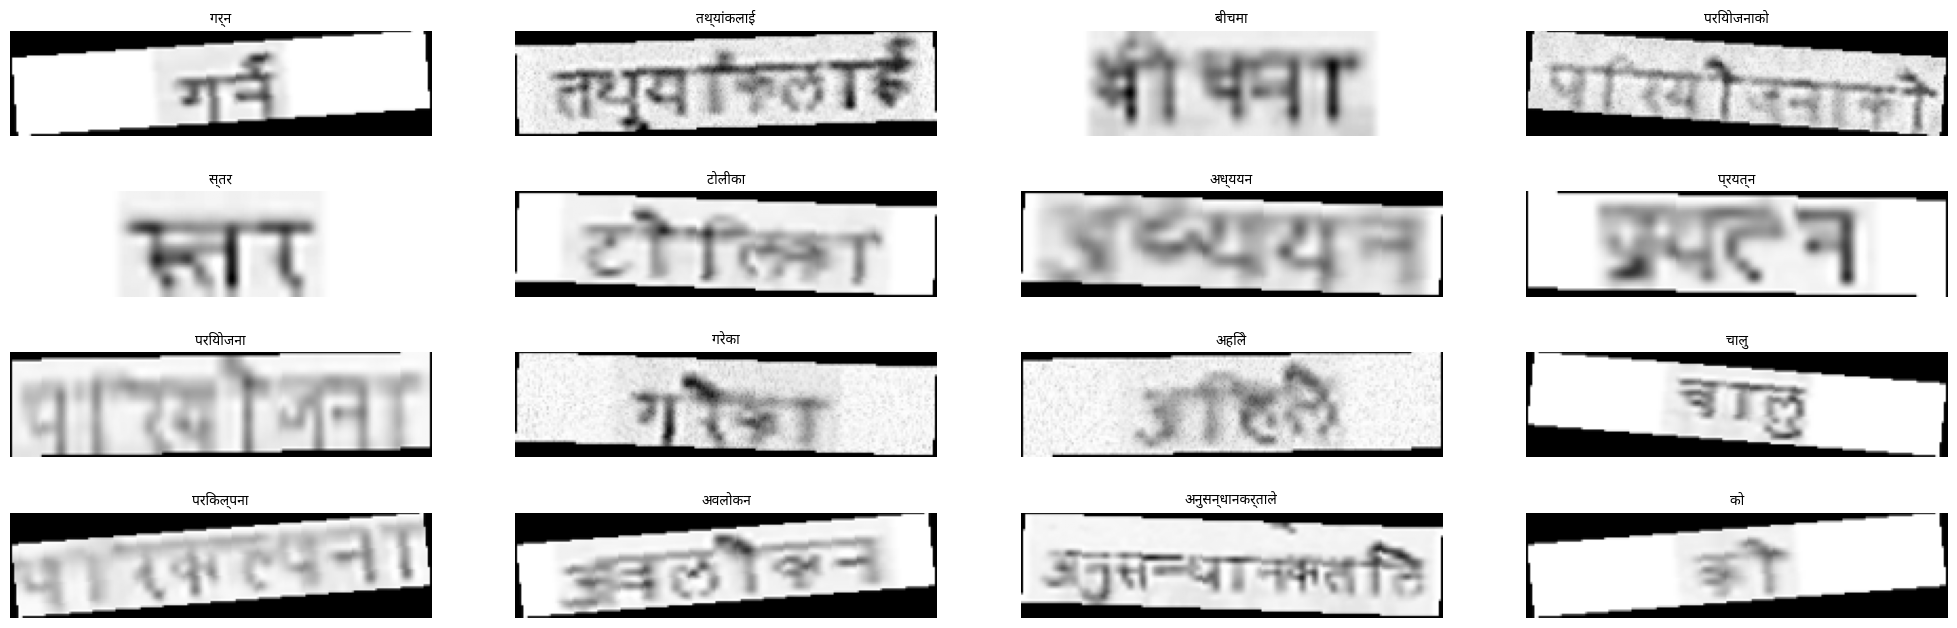

In [110]:
show_images(data=train_ds, cmap='gray')

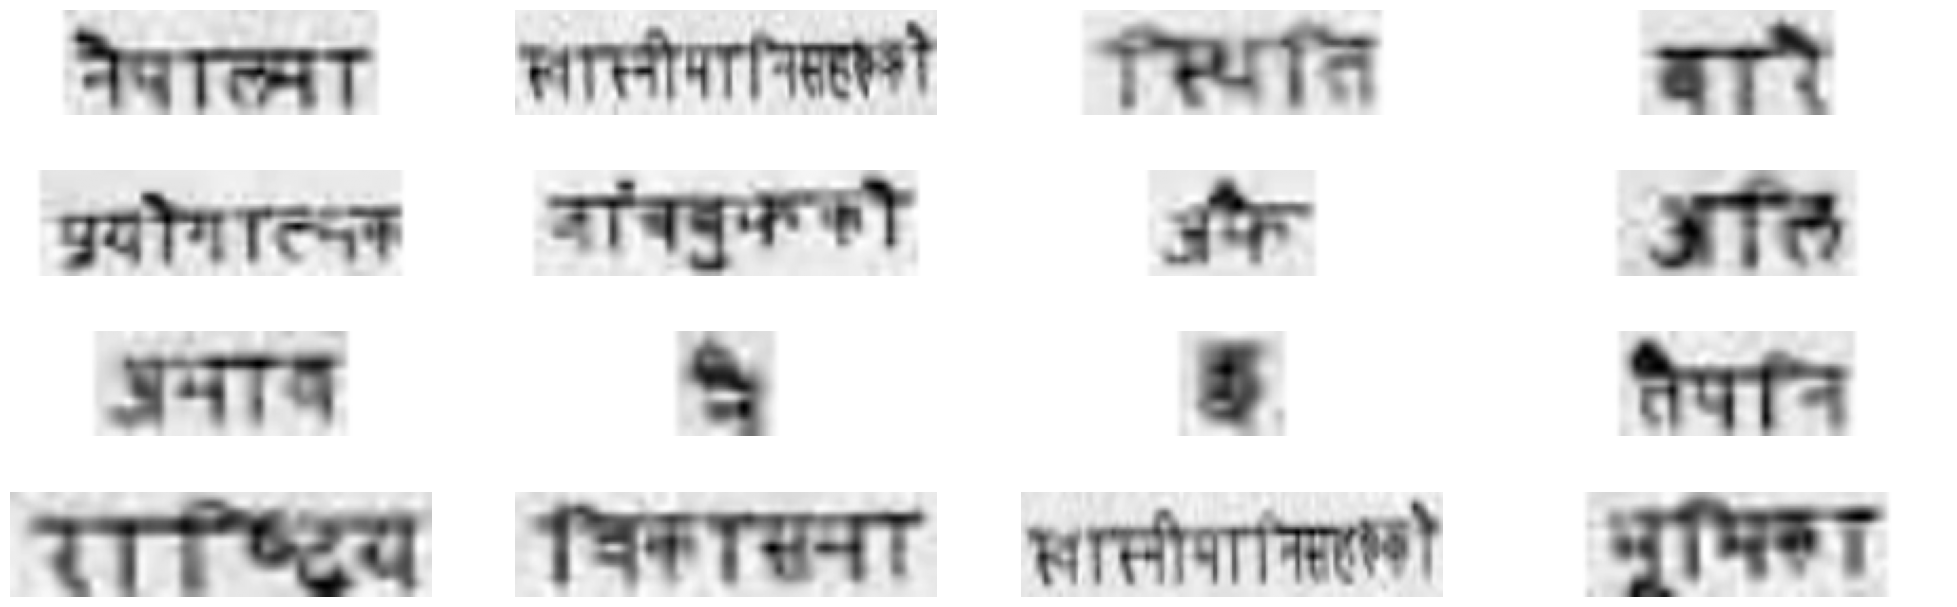

In [111]:
show_images(data=test_ds, cmap='gray')

# Model Definition

### Defines a custom Keras layer that computes and adds the Connectionist Temporal Classification (CTC) loss to the model for training sequence-to-sequence prediction tasks.

In [112]:
class CTCLayer(layers.Layer):
    def __init__(self, **kwargs) -> None:
        super().__init__(**kwargs)
        self.loss_fn = keras.backend.ctc_batch_cost
    def call(self, y_true, y_pred):
        batch_len = tf.cast(tf.shape(y_true)[0], dtype='int64')
        input_len = tf.cast(tf.shape(y_pred)[1], dtype='int64') * tf.ones(shape=(batch_len, 1), dtype='int64')
        label_len = tf.cast(tf.shape(y_true)[1], dtype='int64') * tf.ones(shape=(batch_len, 1), dtype='int64')
        loss = self.loss_fn(y_true, y_pred, input_len, label_len)
        self.add_loss(loss)
        return y_pred

### Decodes the predicted labels from the OCR model, converting numeric values back to characters and removing unknown tokens to produce the final text output.

In [113]:
def decode_pred(pred_label):

    '''
    The decode_pred function is used to decode the predicted labels generated by the OCR model.
    It takes a matrix of predicted labels as input, where each time step represents the probability
    for each character. The function uses CTC decoding to decode the numeric labels back into their
    character values. The function also removes any unknown tokens and returns the decoded texts as a
    list of strings. The function utilizes the num_to_char function to map numeric values back to their
    corresponding characters. Overall, the function is an essential step in the OCR process, as it allows
    us to obtain the final text output from the model's predictions.

    Argument :
        pred_label : These are the model predictions which are needed to be decoded.

    Return:
        filtered_text : This is the list of all the decoded and processed predictions.

    '''

    # Input length
    input_len = np.ones(shape=pred_label.shape[0]) * pred_label.shape[1]

    # CTC decode
    decode = keras.backend.ctc_decode(pred_label, input_length=input_len, greedy=True)[0][0][:,:MAX_LABEL_LENGTH]

    # Converting numerics back to their character values
    chars = num_to_char(decode)

    # Join all the characters
    texts = [tf.strings.reduce_join(inputs=char).numpy().decode('UTF-8') for char in chars]

    # Remove the unknown token
    filtered_texts = [text.replace('[UNK]', " ").strip() for text in texts]

    return filtered_texts

### This code defines a deep learning model for optical character recognition (OCR) using a combination of convolutional neural networks (CNNs) for feature extraction and bidirectional long short-term memory (LSTM) networks for sequence learning, concluding with a custom CTC loss layer for training.

In [114]:
# Input Layer
input_images = layers.Input(shape=(IMG_WIDTH, IMG_HEIGHT, 1), name="image")

# Labels : These are added for the training purpose.
target_labels = layers.Input(shape=(None, ), name="label")

# CNN Network
x = layers.Conv2D(
    filters=32,
    kernel_size=3,
    strides=1,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)(input_images)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(
    filters=32,
    kernel_size=3,
    strides=1,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)(x)
x = layers.BatchNormalization()(x)

x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = layers.Conv2D(
    filters=64,
    kernel_size=3,
    strides=1,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(
    filters=128,
    kernel_size=3,
    strides=1,
    padding='same',
    activation='relu',
    kernel_initializer='he_normal'
)(x)
x = layers.BatchNormalization()(x)

x = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

# Encoding Space
encoding = layers.Reshape(target_shape=((IMG_WIDTH//4), (IMG_HEIGHT//4)*128))(x)
encoding = layers.Dense(128, activation='relu', kernel_initializer='he_normal')(encoding)
encoding = layers.Dropout(0.5)(encoding)

# RNN Network
x = layers.Bidirectional(layers.LSTM(256, return_sequences=True, dropout=0.5))(encoding)
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.5))(x)

# Output Layer
output = layers.Dense(len(char_to_num.get_vocabulary())+1, activation='softmax')(x)

# CTC Layer
ctc_layer = CTCLayer()(target_labels, output)

# Model
ocr_model = keras.Model(
    inputs=[input_images, target_labels],
    outputs=[ctc_layer]
)

In [115]:
plot_model(ocr_model, show_shapes=True, show_layer_names=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


### Compiles the OCR model with the Adam optimizer and trains it on the training dataset with validation, using early stopping and model checkpoint callbacks.

Epoch 1/2


326/326 ━━━━━━━━━━━━━━━━━━━━ 85s 248ms/step - loss: 387.3268 - val_loss: 340.8423 - learning_rate: 0.0010
Epoch 2/2
326/326 ━━━━━━━━━━━━━━━━━━━━ 83s 256ms/step - loss: 340.5102 - val_loss: 324.0285 - learning_rate: 0.0010


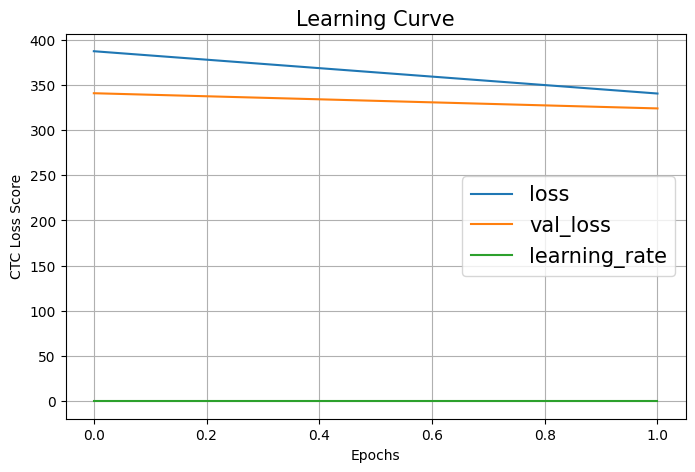

In [116]:
# Compile
ocr_model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3))

# Learning Rate Scheduler
lr_scheduler = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

# Train
history = ocr_model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=2,
    callbacks=[
        callbacks.EarlyStopping(patience=5, restore_best_weights=True),
        lr_scheduler
    ]
)

# Learning Curve
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.legend(fontsize=15)
plt.xlabel("Epochs")
plt.ylabel("CTC Loss Score")
plt.title("Learning Curve", fontsize=15)
plt.grid()
# plt.savefig("OCRModel-LearningCurve.png")
plt.show()

In [117]:
# Model Summary
ocr_model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image (InputLayer)  │ (None, 200, 50,   │          0 │ -                 │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 200, 50,   │        320 │ image[0][0]       │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 50,   │        128 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 200, 50,   │      9,248 │ batch_normalizat… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 200, 50,   │        128 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 100, 25,   │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 100, 25,   │     18,496 │ max_pooling2d_2[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 25,   │        256 │ conv2d_6[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 100, 25,   │     73,856 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 25,   │        512 │ conv2d_7[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 50, 12,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 50, 1536)  │          0 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 50, 128)   │    196,736 │ reshape_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 50, 128)   │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_2     │ (None, 50, 512)   │    788,480 │ dropout_1[0][0]   │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_3     │ (None, 50, 256)   │    656,384 │ bidirectional_2[… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ label (InputLayer)  │ (None, None)      │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 50, 64)    │     16,448 │ bidirectional_3[… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 5,281,954 (20.15 MB)

 Trainable params: 1,760,480 (6.72 MB)

 Non-trainable params: 512 (2.00 KB)

 Optimizer params: 3,520,962 (13.43 MB)

### Creates an inference model from the trained OCR model for making predictions and prints the model summary.

In [121]:
# Model required for inference
# Get the image input from the model inputs (not from input layer)
image_input = ocr_model.input[0]  # First input is the image
# Get the dense layer before CTC (this is the output we want for predictions)
output_layer = ocr_model.get_layer(name='dense_3')  # Updated layer name

inference_model = keras.Model(
    inputs=image_input,
    outputs=output_layer.output
)

# Model summary
inference_model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ image (InputLayer)              │ (None, 200, 50, 1)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 200, 50, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 200, 50, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 200, 50, 32)    │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 200, 50, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 100, 25, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 100, 25, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 100, 25, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 100, 25, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 100, 25, 128)   │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 50, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 50, 1536)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 50, 128)        │       196,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 50, 512)        │       788,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 50, 256)        │       656,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 50, 64)         │        16,448 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,760,992 (6.72 MB)

 Trainable params: 1,760,480 (6.72 MB)

 Non-trainable params: 512 (2.00 KB)

In [122]:
print(decode_pred(inference_model.predict(test_ds))[:10])   #convert to test_ds

98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step
['सा', 'सका', 'स', 'स', 'सका', 'सा', 'स', 'स', 'स', 'स']
['सा', 'सका', 'स', 'स', 'सका', 'सा', 'स', 'स', 'स', 'स']


/home/psyduck/Desktop/Opensource/RenAIssance_CRNN_OCR_Shashank_Shekhar_Singh/.venv/lib64/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 108 (l) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
/home/psyduck/Desktop/Opensource/RenAIssance_CRNN_OCR_Shashank_Shekhar_Singh/.venv/lib64/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 112 (p) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
/home/psyduck/Desktop/Opensource/RenAIssance_CRNN_OCR_Shashank_Shekhar_Singh/.venv/lib64/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 84 (T) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
/home/psyduck/Desktop/Opensource/RenAIssance_CRNN_OCR_Shashank_Shekhar_Singh/.venv/lib64/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 114 (r) missing from font(s) Noto Sans Devanagari.
  fig.canva

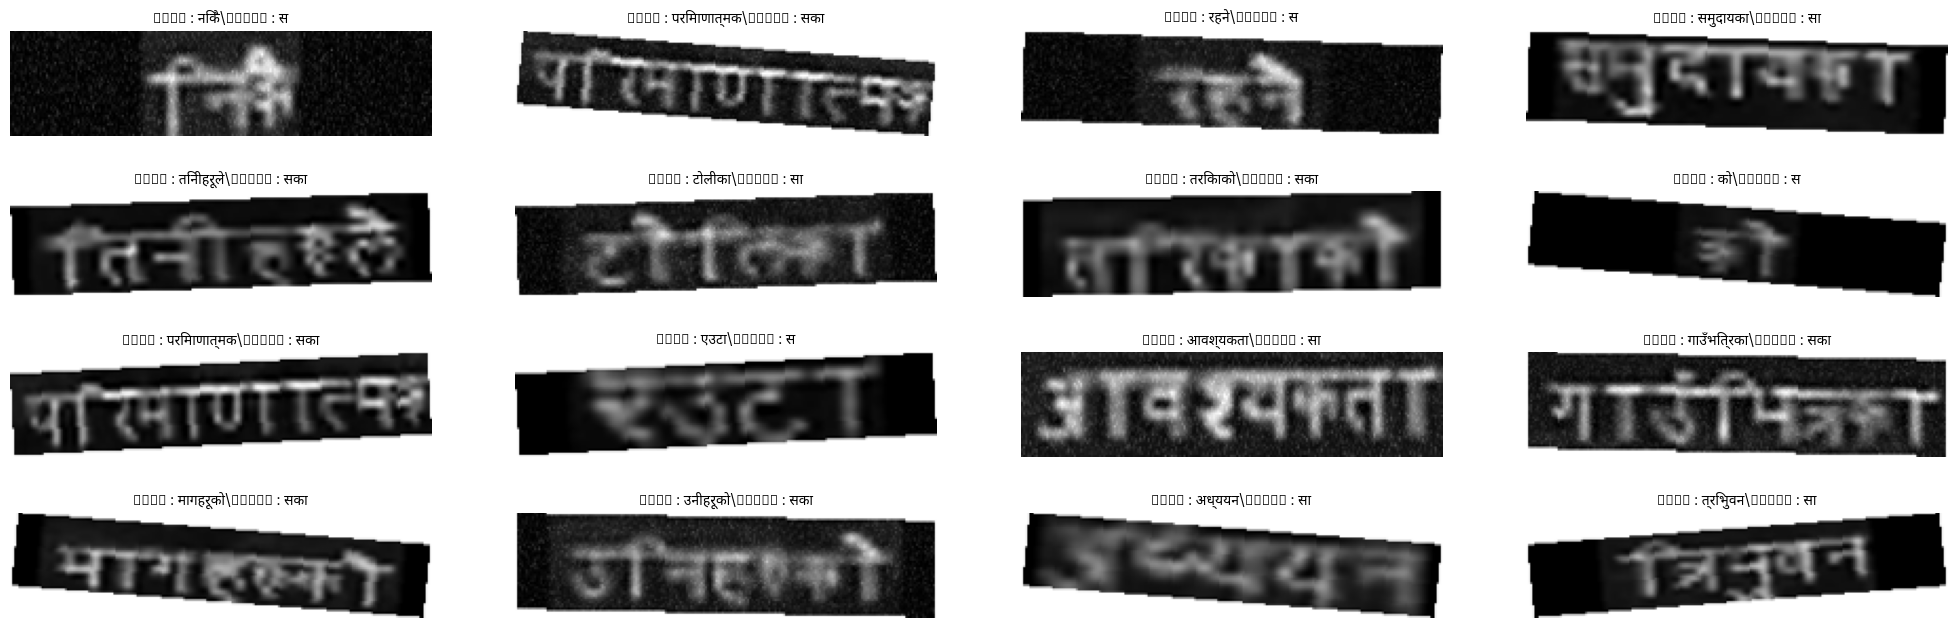

In [123]:
show_images(data=train_ds, model=inference_model, decode_pred=decode_pred, cmap='binary')

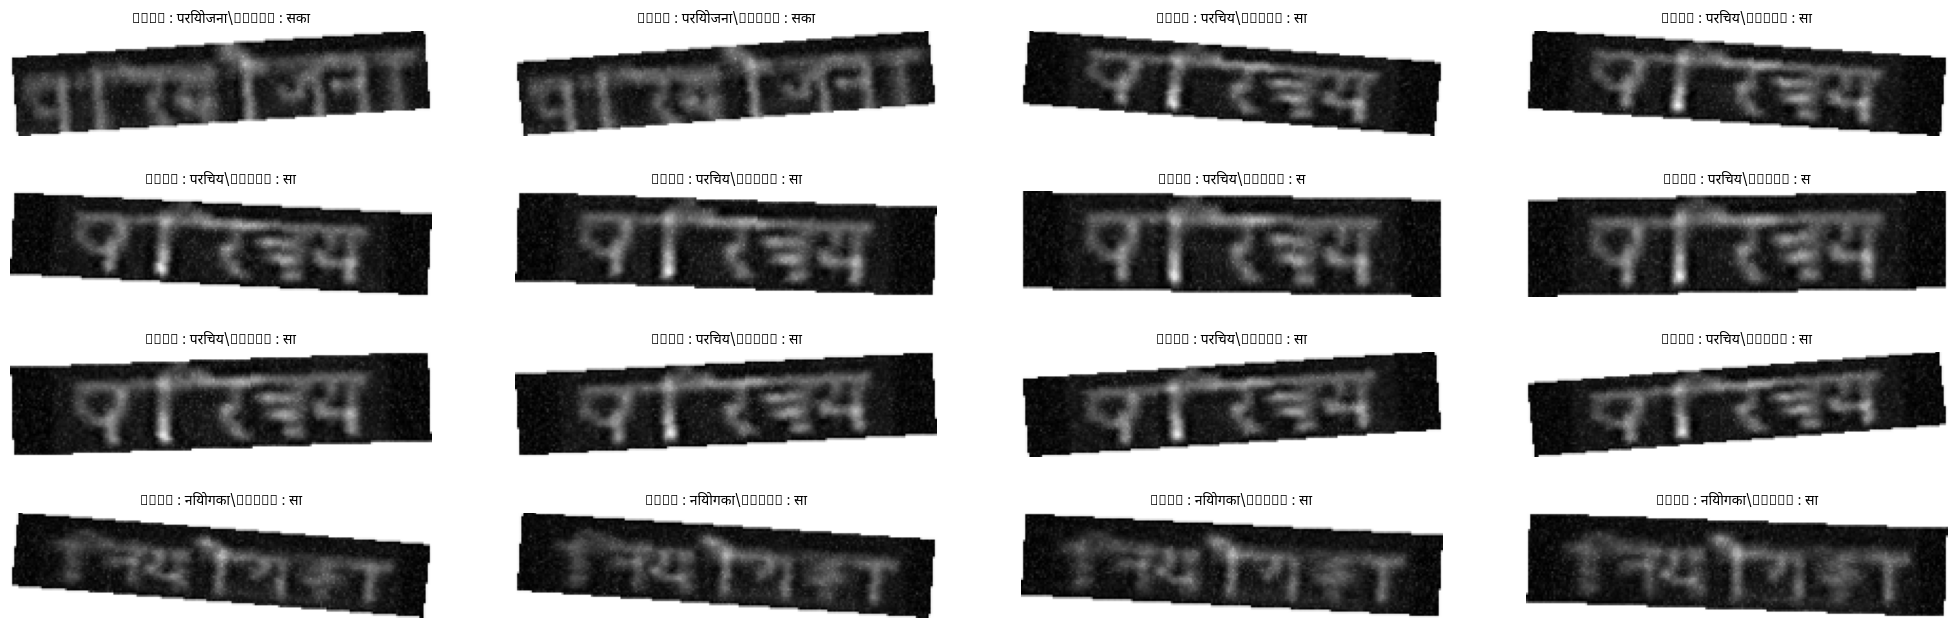

In [124]:
show_images(data=valid_ds, model=inference_model, decode_pred=decode_pred, cmap='binary')

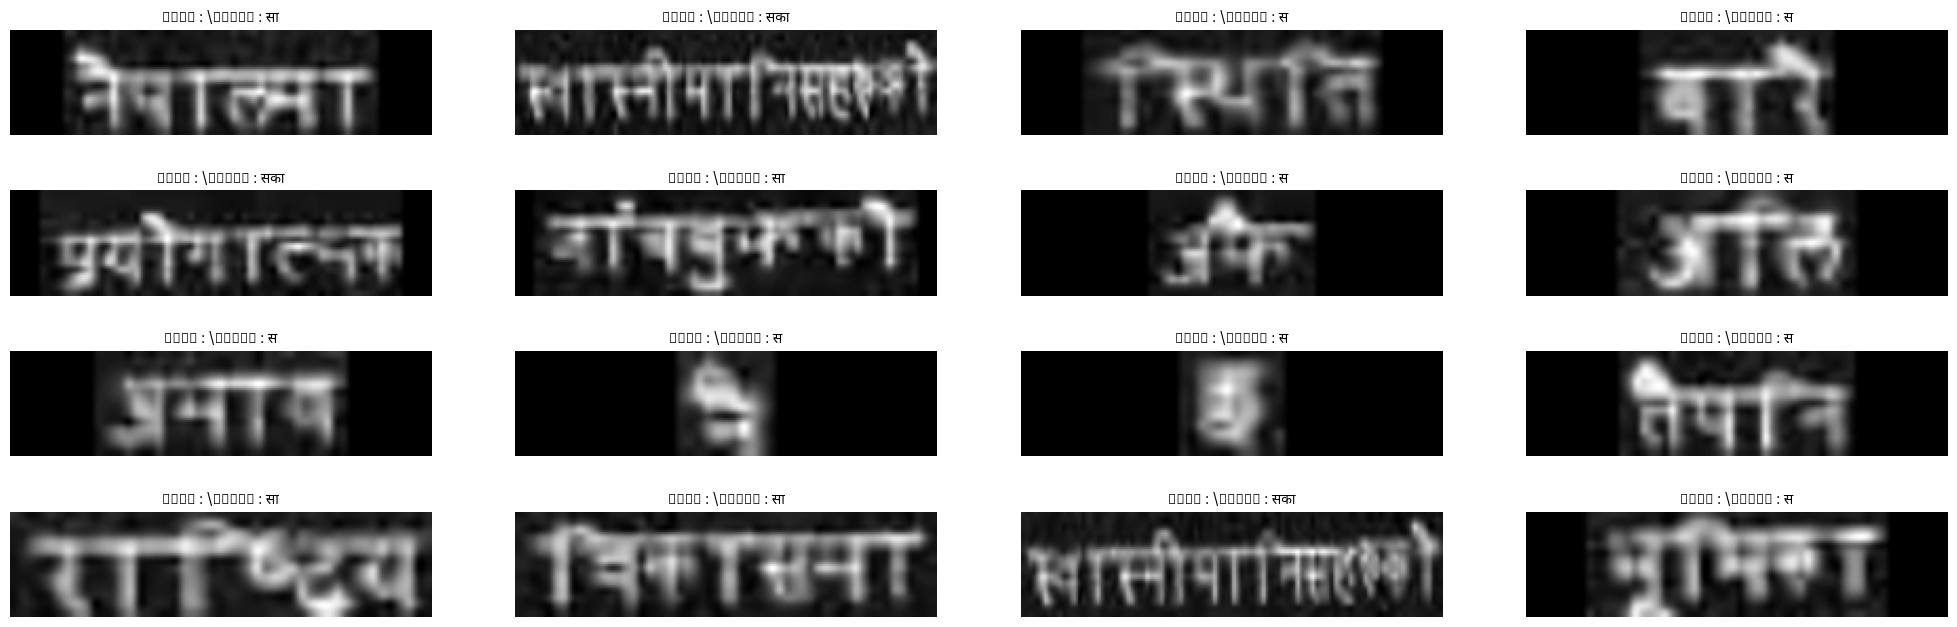

In [125]:
show_images(data=test_ds, model=inference_model, decode_pred=decode_pred, cmap='binary')

# Saving the model

In [126]:
# Saving the model
ocr_model.save('ocr_model.h5')

In [128]:
# Load the saved model using the code below
# Need to provide custom objects when loading models with custom layers
loaded_model = keras.models.load_model('ocr_model.h5', custom_objects={'CTCLayer': CTCLayer})

### Loading Models with Custom Layers

When loading a saved model that contains custom layers (like our `CTCLayer`), you need to provide the custom objects to Keras so it knows how to reconstruct the layer. There are two main approaches:

1. **Using `custom_objects` parameter**: Pass a dictionary mapping layer names to their classes
2. **Using `custom_object_scope`**: Use a context manager for cleaner code, especially with multiple custom objects

### Generates and decodes predictions from the inference model on the test dataset, printing the results as it is written in the book.


In [67]:
test_csv.head()

,FILENAME,IDENTITY
0,./testing_data1/।.png,।
1,./testing_data1/१९८०.png,१९८०
2,./testing_data1/२.png,२
3,./testing_data1/५ को.png,५ को
4,./testing_data1/अ.png,अ


In [129]:
df_infer = test_csv

# Step 1: Sort the dataframe based on values before ';'
df_infer['before_semicolon'] = df_infer['IDENTITY'].apply(lambda x: int(x.split(';')[0]))
df_infer['after_semicolon'] = df_infer['IDENTITY'].apply(lambda x: int(x.split(';')[1]))
sorted_df = df_infer.sort_values(['before_semicolon']).reset_index(drop=True)
sorted_df.drop(columns=['before_semicolon', 'after_semicolon'], inplace=True)

In [130]:
sorted_df.shape

(1561, 2)

In [131]:
sorted_df.head()

,FILENAME,IDENTITY
0,./testing_data1/0;0.png,0;0
1,./testing_data1/1;0.png,1;0
2,./testing_data1/2;0.png,2;0
3,./testing_data1/3;0.png,3;0
4,./testing_data1/4;0.png,4;0


In [132]:
sorted_df['IDENTITY'] = sorted_df['IDENTITY'].astype(str)

sorted_dfs = tf.data.Dataset.from_tensor_slices(
    (np.array(sorted_df['FILENAME'].to_list()), np.array(sorted_df['IDENTITY'].to_list()))
).map(encode_single_sample, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)

decoded_predictions = decode_pred(inference_model.predict(sorted_dfs))

98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step


In [133]:
sorted_df.head()

,FILENAME,IDENTITY
0,./testing_data1/0;0.png,0;0
1,./testing_data1/1;0.png,1;0
2,./testing_data1/2;0.png,2;0
3,./testing_data1/3;0.png,3;0
4,./testing_data1/4;0.png,4;0


In [134]:
pred = sorted_df['IDENTITY'].tolist()

# Print decoded predictions with a new line when there's a change in the number after ';'
current_group = None
i=0
for prediction in pred:
    before, after = map(int, prediction.split(';'))

    if current_group is None:
        current_group = after

    if after != current_group:
        print()  # Start a new line for the new group
        current_group = after

    print(decoded_predictions[i], end=' ')
    i+=1
print()

सा सका स स सका सा स स 
स स स स सा सा सका स स स सा 
स स सा स स स सा स स स स स स 
स सा स स स 
स स सा सका स स स सा स स 
स स स स स सा सा स स क स स स क स 
सा स स सा सा सा स सका स स 
स स सा सा सका क सा सा सका सा 
स स सा स स स सा स स स स स 
स सा स स क सा स सा सा स स स 
स सा स स स स स सा सा सका स स 
स स स क स स सा स स सा सा स 
स स स स सा स स सा सा स स स 
स स सा स सा स सा स स स सका 
स सा स सा स स 
सा सका स स स स स सा स 
स 
सा स स सा स सा 
सा स 
क 
स स स सा स स सा सका स स 
स स स स स 
स क स स स स स स स स सा 
क स स सा सा सा स स सा स 
स स स स स क स क स स सा सा 
सा स स स स सा सा सा सा 
स स सा सा स सा स स सा 
क सा स स स सा स सा स स 
क स स स क स स स स स स 
क स स सा स सा स स क स सा 
स स स स स सा स स सा स सा 
स स सा स सा सा सा सा 
सा स स सा सा स स स स 
स स स सा स सा सा स स स 
स स स सा स सा सा स 
स सा सा स सका स स स सा सा 
स स स स स सा स सा सा सा सा 
सा सा सा सा सा सा स स सा 
स स सा सा स स स सा स क सा सा 
स स स सका स स स सा स स सा स 
स स स सा स सा स सा सा स 
स स स स क सका क सा सा स स स 
स स सका स स सा स 

# Saving pedictions as .txt file

In [135]:
formatted_output = []

current_group = None
i = 0
for prediction in pred:
    before, after = map(int, prediction.split(';'))

    if current_group is None:
        current_group = after

    if after != current_group:
        formatted_output.append('\n')  # Start a new line for the new group
        current_group = after

    formatted_output.append(decoded_predictions[i] + ' ')
    i += 1

formatted_output.append('\n')  # Final new line

with open('formatted_predictions.txt', 'w') as file:
    file.writelines(formatted_output)

In [136]:
predictions = decode_pred(inference_model.predict(valid_ds))
true = df_valid['IDENTITY'].tolist()

82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step


In [137]:
import numpy as np
from difflib import SequenceMatcher

def calculate_cer(predicted, ground_truth):
    # Calculate the Levenshtein distance between the predicted and ground truth
    matcher = SequenceMatcher(None, ground_truth, predicted)
    num_edits = sum(triple[-1] for triple in matcher.get_opcodes() if triple[0] != 'equal')

    # CER is the number of edits divided by the total number of characters in the ground truth
    return num_edits / len(ground_truth) if len(ground_truth) > 0 else 1.0

def calculate_accuracy(true_list, predictions_list):
    correct_count = sum([pred == gt for pred, gt in zip(predictions_list, true_list)])
    return correct_count / len(true_list)

# Calculate CER for each word and the overall Accuracy
cer_list = [calculate_cer(pred, gt) for pred, gt in zip(predictions, true)]
cer = np.mean(cer_list)

accuracy = calculate_accuracy(true, predictions)

print(f"Character Error Rate (CER): {cer}")
print(f"Accuracy: {accuracy}")

Character Error Rate (CER): 0.35087764897672735
Accuracy: 0.0


/home/psyduck/Desktop/Opensource/RenAIssance_CRNN_OCR_Shashank_Shekhar_Singh/.venv/lib64/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 108 (l) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
/home/psyduck/Desktop/Opensource/RenAIssance_CRNN_OCR_Shashank_Shekhar_Singh/.venv/lib64/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 112 (p) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
/home/psyduck/Desktop/Opensource/RenAIssance_CRNN_OCR_Shashank_Shekhar_Singh/.venv/lib64/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 84 (T) missing from font(s) Noto Sans Devanagari.
  fig.canvas.print_figure(bytes_io, **kw)
/home/psyduck/Desktop/Opensource/RenAIssance_CRNN_OCR_Shashank_Shekhar_Singh/.venv/lib64/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 114 (r) missing from font(s) Noto Sans Devanagari.
  fig.canva

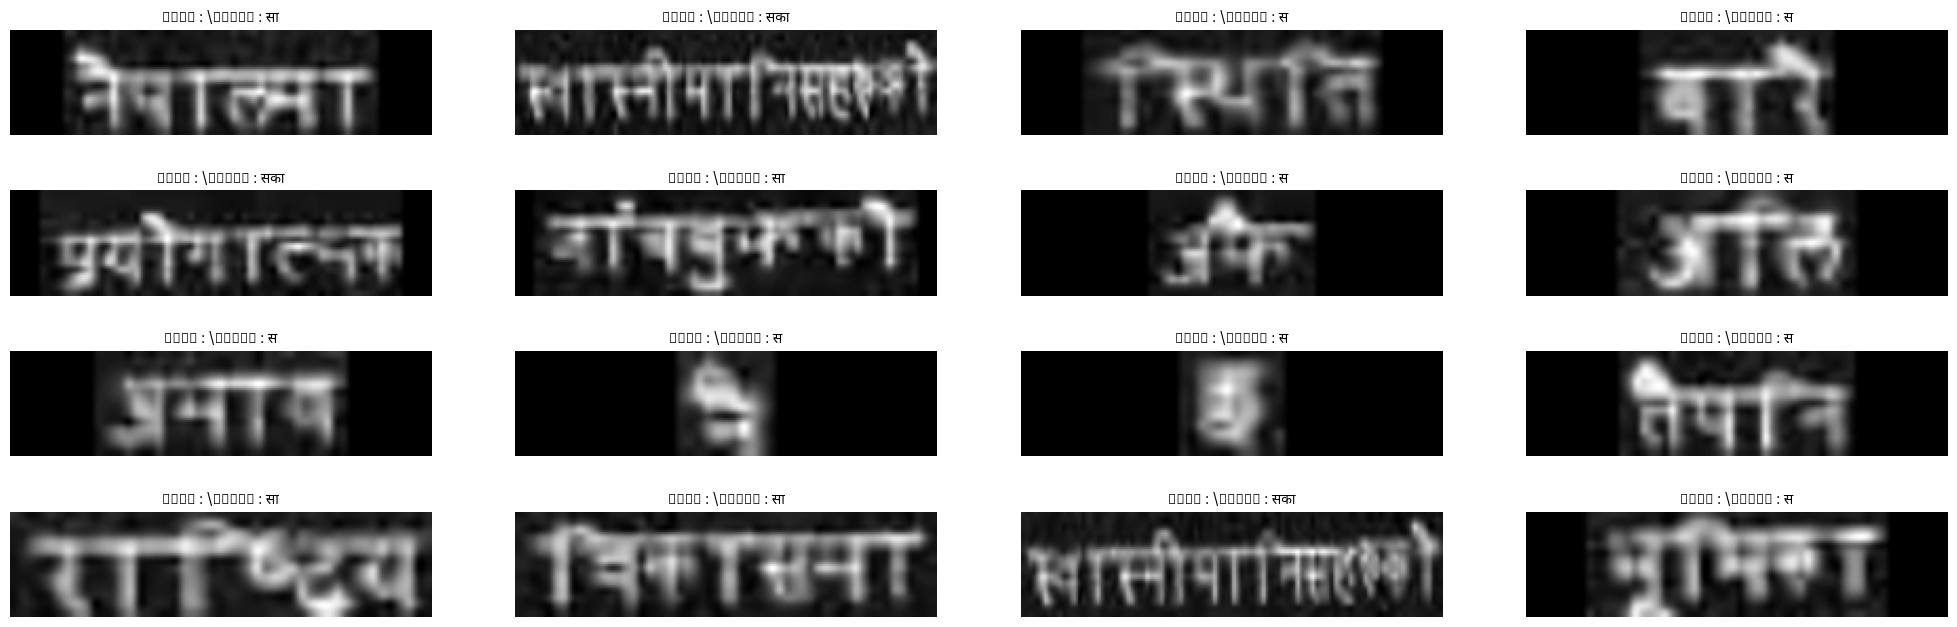

In [138]:
sorted_df = tf.data.Dataset.from_tensor_slices(
    (np.array(sorted_df['FILENAME'].to_list()), np.array(sorted_df['IDENTITY'].to_list()))
).map(encode_single_sample, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE).prefetch(AUTOTUNE)
show_images(data=sorted_df, model=inference_model, decode_pred=decode_pred, cmap='binary')